# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [78]:
!pip install palmerpenguins

In [79]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


**Variables to dummify:** species, island, sex, and year.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [81]:
penguins = penguins[["bill_length_mm", "bill_depth_mm"]]
penguins = penguins.dropna()

In [82]:
# simple linear regression model
linear_model = LinearRegression()
linear_model.fit(X = penguins[["bill_length_mm"]], y = penguins["bill_depth_mm"])
penguins["linear_pred"] = linear_model.predict(X = penguins[["bill_length_mm"]])

In [83]:
linear_model.coef_, linear_model.intercept_

(array([-0.08502128]), np.float64(20.885468318532755))

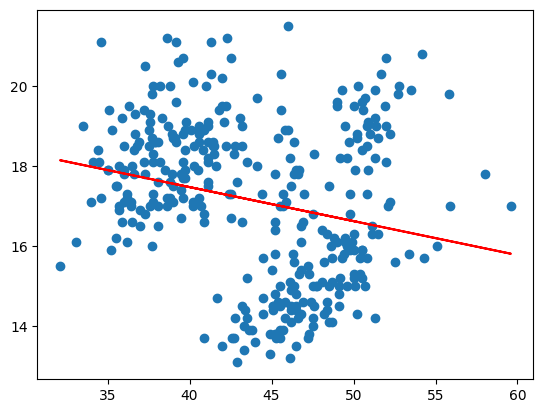

In [84]:
plt.scatter(x = penguins["bill_length_mm"], y = penguins["bill_depth_mm"])
plt.plot(penguins["bill_length_mm"], penguins["linear_pred"], color = "red")
plt.show()

In [85]:
# quadratic model
penguins["bill_length_mm^2"] = penguins["bill_length_mm"] ** 2
quadratic_model = LinearRegression()
quadratic_model.fit(X = penguins[["bill_length_mm", "bill_length_mm^2"]], y = penguins["bill_depth_mm"])
penguins["quadratic_pred"] = quadratic_model.predict(X = penguins[["bill_length_mm", "bill_length_mm^2"]])

In [86]:
quadratic_model.coef_, quadratic_model.intercept_

(array([-1.42149289,  0.0151644 ]), np.float64(49.88100322111957))

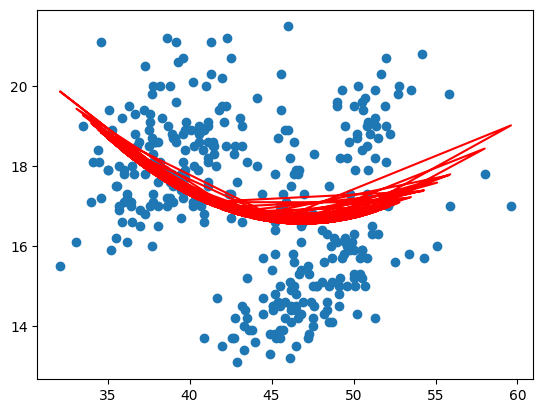

In [87]:
plt.scatter(x = penguins["bill_length_mm"], y = penguins["bill_depth_mm"])
plt.plot(penguins["bill_length_mm"], penguins["quadratic_pred"], color = "red")
plt.show()

In [88]:
# cubic model
penguins["bill_length_mm^3"] = penguins["bill_length_mm"] ** 3
cubic_model = LinearRegression()
cubic_model.fit(X = penguins[["bill_length_mm", "bill_length_mm^2", "bill_length_mm^3"]], y = penguins["bill_depth_mm"])
penguins["cubic_pred"] = cubic_model.predict(X = penguins[["bill_length_mm", "bill_length_mm^2", "bill_length_mm^3"]])

In [89]:
cubic_model.coef_, cubic_model.intercept_

(array([ 7.00494111e+00, -1.74355549e-01,  1.40554271e-03]),
 np.float64(-73.59178504895722))

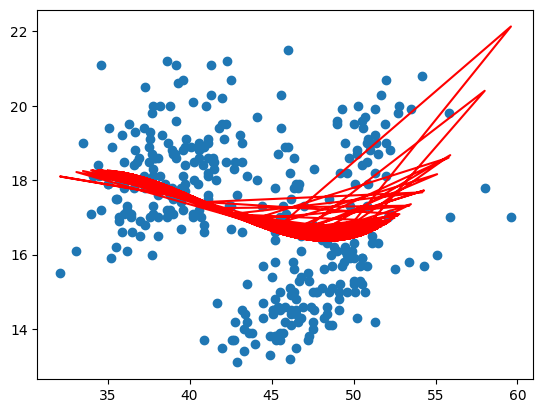

In [90]:
plt.scatter(x = penguins["bill_length_mm"], y = penguins["bill_depth_mm"])
plt.plot(penguins["bill_length_mm"], penguins["cubic_pred"], color = "red")
plt.show()

In [91]:
# degree 10 polynomial model
poly_features = PolynomialFeatures(degree = 10, include_bias = False)
X_poly = poly_features.fit_transform(X = penguins[["bill_length_mm"]])
poly_model = LinearRegression()
poly_model.fit(X = X_poly, y = penguins["bill_depth_mm"])
penguins["poly_pred"] = poly_model.predict(X = X_poly)

In [92]:
poly_model.coef_, poly_model.intercept_

(array([ 9.20270004e-14,  3.62854533e-12,  1.54315816e-10,  3.99369189e-09,
         7.58162706e-08,  8.32820273e-07, -5.95935634e-08,  1.61049202e-09,
        -1.94392298e-11,  8.82283808e-14]),
 np.float64(-20.898873599582277))

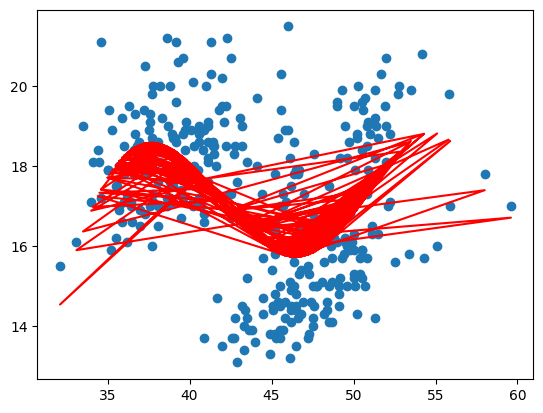

In [93]:
plt.scatter(x = penguins["bill_length_mm"], y = penguins["bill_depth_mm"])
plt.plot(penguins["bill_length_mm"], penguins["poly_pred"], color = "red")
plt.show()

In [95]:
# predictions
penguins_pred = penguins[["bill_length_mm", "bill_depth_mm", "linear_pred", "quadratic_pred", "cubic_pred", "poly_pred"]]
penguins_pred.head()

,bill_length_mm,bill_depth_mm,linear_pred,quadratic_pred,cubic_pred,poly_pred
0,39.1,18.7,17.561136,17.484121,17.763289,18.385233
1,39.5,17.4,17.527128,17.392292,17.688565,18.263916
2,40.3,18.0,17.459111,17.223194,17.532171,17.959386
4,36.7,19.3,17.765187,18.136996,18.128998,18.487002
5,39.3,20.6,17.544132,17.437600,17.726273,18.327503


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

1. **Underfitting:** The linear model is underfitting because the line is straight and doesn't follow the points.
2. **Overfitting:** The degree 10 polynomial model is overfitting because there are too many lines zigzagging around the points.
3. **Best:** Between the quadratic and cubic models, the quadratic model seems to fit the data best. The quadratic lines match the points better than the linear line. The cubic lines are okay, but there are outlier zigzags at higher values.